# Neural Networks CW1

## Approach
This courswork follows the 'universal approach of machine learning' by Cholet. The approach can be assembled by the following steps:
1. Defining the problem and assembling the data
2. Choosing a measure of success
3. Defining an evaluation protocol
4. Loading the Data
5. Exploratory Data Analysis
6. Preparing the data
7. Developing a model
8. Scaling - Ovefit the Model
9. Regularize model and hyperparamter tuning

## Introduction

Based on my personal interest in digital health, the question, how to leverage medcinine often comes up. At the times of ChatGPT the term AI is present everywhere. Especially in the field of modern medicin, physicians and scientis search approaches to upscale medicine and make it more efficient. The key problem of scaling up is that one physician can take care of one patient at the time. But what would be if multiple patients could be helped at the same time. That is the point where AI comes along as all healing solution. Following this path forcibly it has to proven how trustworthy these kind of solutions are. Personally I can image that the fields of A.I. and machine learning are going to enter medicine step by step in minor fields to achieve a higher grade of automation e.g. evaluating X-ray images.


## 1. Definition of the Problem

In this coursework I would like to build a neural network to predict the presents of a heart disease. As input data serves a dataset downloaded from Kaggle. The dataset is called 'Heart Failure Prediction Dataset'. The aim is to predict, based on the given data, whether a heart disease is present. This results in the problem of binary classification. In this context, the hypothesis is: Based on the given medical observations like 'resting blood preasure' and 'chest pain type' it can be predicted if a heart disease is present.



## 2. Defining a Measure of Success

In order to evaluate the results of the model built in this notebook a measure of success needs to be defined. As mentioned in the previous section the aim is to solve a binary classification model. In dependence of the data distribution accuracy and area under the receiver operating characteristics curve (ROC, AUC) are suitable metrics.

Particularly the ROC, AUC is a good measure of success. The ROC (receiver operating characteristics curve) is a graphical representation to evaluate the binary classifier. To create the ROC the true positive rate (TPR) and false positive rate (FPR) is needed. The curve for the ROC is created by plotting TPR, FPR against each other.

An additional measure for ROC is the 'Area Under the Curve' (AUC). It measures the entire two-dimensional area under the ROC. It is measure of all possible classification tresh holds. An AUC of 1 would represent a perfect classifier while an AUC of 0.5 would represent a useless classifier.

The higher the ROC to th upper left corner, the higher is the overall accuracy. A line with a roughly 45 degree diagonal would represent a classifier with very limited discrimination ability.


## 3. Defining an evaluation protocol

Basically there a three different options to evaluate the dataset: splitting the data in a trainingset and a validation set, performing a K-fold crossvalidation or an iterated K-fold validation. Choosing the right evalution model it is important keeping the data in mind. At this point, I must anticipate the exploratory data analysis somewhat. The dataset holds 918 observation. Based on my experience so far, I would not classify that as a little data, but not a lot either. Therefore, at the current stage of the work I would tend to favour a K-fold validation instead of holding back a validation set. Based on the insights of the explorative data analysis I will decide whether I apply a K-fold validation or an iterated K-fold validation. This decision will be mainly based on the degree of required performance which is needed to perform the necessary calculations.

## 4. Loading the Dataset

In the following steps it is shown how the data is loaded. The dataset can be found in directory called 'data' in the file 'heart.csv'. The dataset was downloaded from kaggle and is called 'Heart Failure Prediction Dataset'. The corresponding link can be found in the chapter references.

In [1]:
# importing necessary libraries
import pandas as pd

In [2]:
# defining relative path to file
file= './data/heart.csv'

# read file as pandas dataframe
df= pd.read_csv(file, sep=',', header= 0) # define seperator as ',' and the position of the header

In [3]:
# validation that data was load correctly
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## 5. Exploratory Data Analysis

Now that the data has been loaded, the exploratory data analysis can begin. The main aim of this analysis to gain necessary insights of the data which should help to build suitable model and inherit all other necessary methods. The amount of available observations and the number nature of features should be determined. Most import is to validate the class distribution of the data. This helps to apply measures to have a balanced data distribution when the model is trained. Otherwise there is a risk that the model is biased by the imbalanced data and can not handle correctly data from the underrepresented class.

The amount of observation can give a notice on the evaluation process that needs to apply, i.e. for a big dataset a validation set is hold back for a small dataset the use of K-fold validation would be a better fit. This will have an impact on time or performance that is required to train and validate the model. Using a K-fold validation or especially an iterated K-fold validation is in terms of performance and required calculations more expensive than having enough data to creating a validation set.

Following the feature are examined in more detail. This helps to identify if any kind of data cleaning or normalization of the data needs to be done. If the ranges of the numerical features is located in very different areas. It is beneficial to normalize the data. Later on this will improve the models performance.
Same applies for categorical data. It hase to be brought into shape that it is processable by the model.


### 5.1 Overview Columns

In [4]:
# check the columns of the dataframe
columns= df.columns
print(columns)
print(f'Number of columns: {len(columns)}')

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Number of columns: 12


The output of the cell above shows the columns of the data frame. In total the dataframe has 12 columns. The column 'HeartDisease' is the target column that is supposed.

In the following class distribution of the target colum will be analyzed.

### 5.2 Class Distribution

In [5]:
# Show the class distribution of the target column
df.HeartDisease.value_counts(normalize= True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

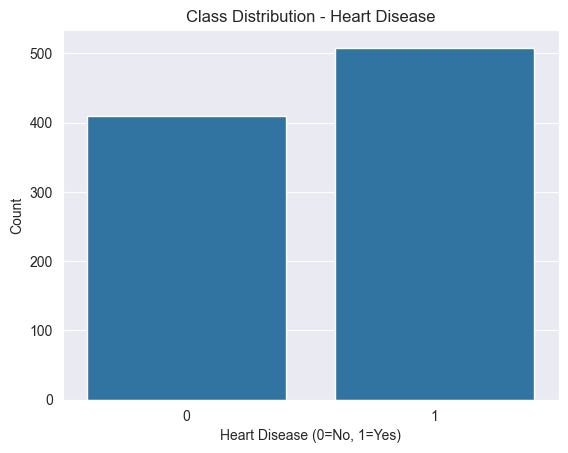

In [6]:
# import necessary libararies
import matplotlib.pyplot as plt
import seaborn as sns

# create a countplot as new figure
fig= sns.countplot(data= df, x='HeartDisease')
# set labels of the figure
fig.set_title('Class Distribution - Heart Disease')
fig.set_xlabel('Heart Disease (0=No, 1=Yes)')
fig.set_ylabel('Count')
plt.show()


The target class is distrbuted in 55% observations that related to a heart disease and 44% without heart disease. This gets quite close to an almost equal distribution. So the target class is reasonably balanced. With this slight deviation it can be considered that the class distribution will not introduce a bias to the final model.

Based on this distribution it can be determined that no resampling technique, such as oversampling or synthetic minority-sampling technique is needed to create a balance of the data.

### 5.3 Defining Evaluation Protocol and Data Distribution

This section takes a close look at the data in the dataset. This information is supposed to help to decide on an evaluation protocol. Therefore it basically can be choosen between 3 technique: 1. Holding back a validation dataset 2. Performing a k-Fold validarion or 3. Performing an iterated k-Foldvalidation.

In the followonh steps I will evaluate the amount and quality of observation. Based on this information a evalutation protocol can be defined.

In [7]:
# Showing the head of dataframe
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
# Check the quality of the data by using the info-method of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The info-method of the Pandas datefraem prints information about the dataframe by displaying column name, Non-Null Count and the datatype of the column.
As in the call above can be seen the datasets consists of 918 observations. It can be seen that no missing or null values. Five features of the datasets are categorical features stored with datatype 'object'. The remaining columns hold numeric features. The column 'HeartDisease' represents the feature thats supposed to be predicted with datatype int64, a numeric value.

=> Reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [9]:
# shows descriptive statistics for numeric columns
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The descriptive statistics give a good overview about the numeric columns. The first thing to look at is the average values. It can be observed that the averages lie between 0.2 and approx. 198. The columns represent a wide range of values. It can be seen that there are no zero values here either. At the same time, it can be seen that the values move within a very wide range. To prepare the data, it would be advisable to scale the data so that no value can have an unusually high influence on the model.

With regard to the evaluation protocol, it can be said that this is a moderately small data set of good quality. Due to the size of the dataset, it makes sense to work with the k-fold crossvalidation in any case. It would be even better to work with iterated k-fold validation. Since the latter method is very computationally intensive, the application depends on the computing resources available (my notebook). If the resources are not sufficient, the classic k-fold cross-validation is used.

In the next cell I will make the distribution of the data of the numerical features again in the form of boxplot diagrams. This should once again show the different value ranges.



/var/folders/s8/0n6kz3c55f9dg9x_j_m0cdk00000gn/T/ipykernel_64767/3382991793.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


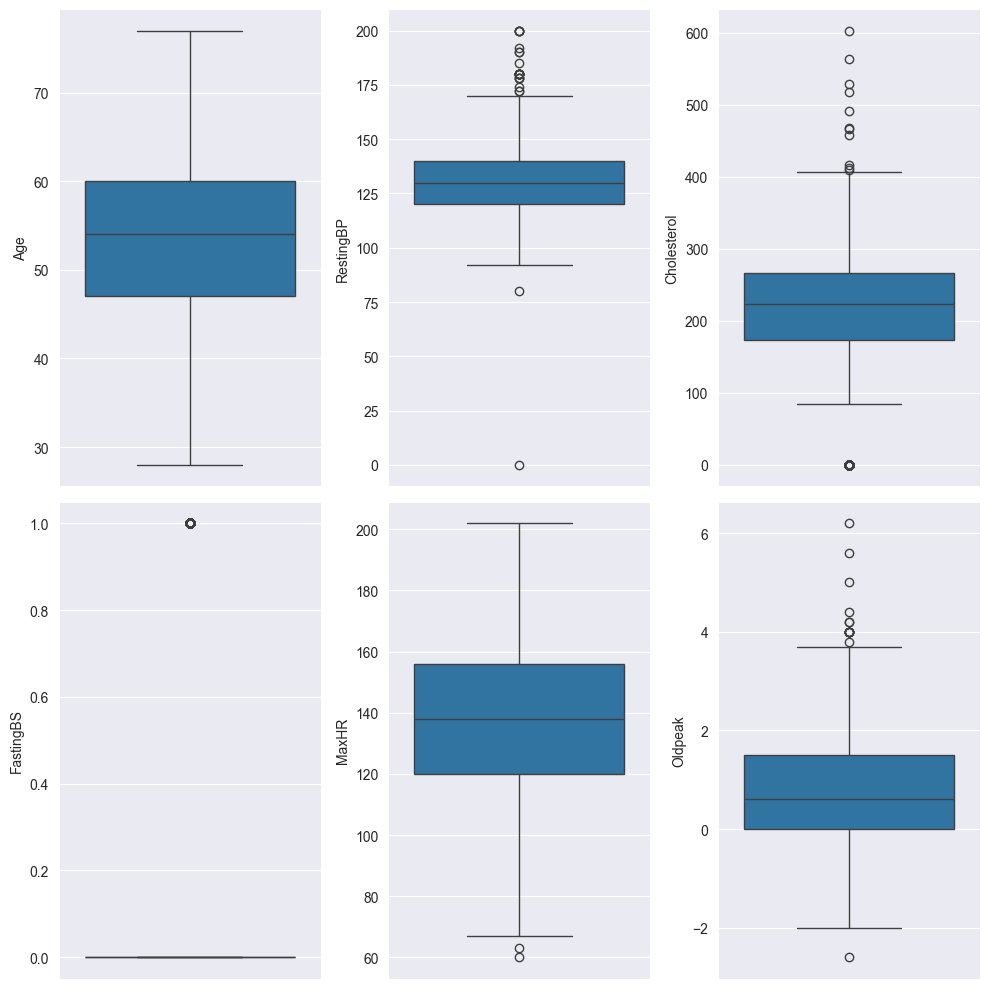

In [10]:
fig, axes= plt.subplots(2,3, figsize=(10,10))
sns.boxplot(data= df, y='Age' ,ax=axes[0,0])
sns.boxplot(data= df, y='RestingBP' ,ax=axes[0,1])
sns.boxplot(data= df, y='Cholesterol' ,ax=axes[0,2])
sns.boxplot(data= df, y='FastingBS' ,ax=axes[1,0])
sns.boxplot(data= df, y='MaxHR' ,ax=axes[1,1])
sns.boxplot(data= df, y='Oldpeak' ,ax=axes[1,2])
fig.tight_layout()
fig.show()


The boloxplot diagrams shown above illustrate the different value ranges for the individual properties. Additional they show existing outliers.

In the next steps we will take a closer look at the categorical values.

In [11]:
# create filter for categorical values
cat_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# print head of df for categorical values
df[cat_columns].head()


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


The cell above shows the head of the dataframe with only categorical features. In the next I will take a look at the unique values of a categorical features.

In [12]:
# print unique values an their occurance fo all categorical data
print([df[column].value_counts() for column in cat_columns])

[Sex
M    725
F    193
Name: count, dtype: int64, ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64, RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64, ExerciseAngina
N    547
Y    371
Name: count, dtype: int64, ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64]


The list above shows all the unique values and the number of them occurring in the categorical features.

What can be seen directly and very clearly here is that female persons only make up just under 26% of the values surveyed.  This is critical insofar as the resulting model shows risks in the prediction of heart disease for women. In fact, no statement can be made for women and the model will be biased in this respect.

Since this is a student research project that focuses on the creation and evaluation of a neural network, I will continue with the data set given here. Even without using a sampling method to represent women better or more evenly. That would go beyond the scope of this paper.

It should also be noted that the categorical data cannot be processed by a neural network in this way. The data must be processed in such a way that it is represented in numerical form.

### Summary Explorational Data Analysis

The following points were identified in the EDA:
- Equal distribution of the target classes
- No data cleaning is needed - non null-values
- The numerical values cover a very wide range -> the numeric value need to be scaled
- Categorical data represented in string values ->  must be converted into numerical values

The next section takes care of transforming the data.


## 6.  Preparing the Data

In the following steps, the data is prepared in such a way that it can be processed by a neural network.  The following steps are carried out for this:

- Splitting the data into "data" and "labels"
- Scaling of the numerical values
- Categorical values are converted into numerical values
- Transformation of the data from a pandas dataframe to a numpy array

### 6.1 Splitting the Data into "Features" Data and "Label" Data

In this section the data is splitted into data features and data labels. The data features represent the observations or features of the dataset. The data labels are the target values that are supposed to be predicted by the model. At this point the data is only dvided into features and labels. A division into trainig data and test date will take place with implementation of an k-fold procedure.

In [34]:
# divide dataframe into featues and labels
df_data = df.iloc[:, :len(df.columns)-1]
df_labels= df.iloc[:,-1]

### 6.2 Scaling Numerical Values

Within in this section the numeridal features will be scaled. This operation is necessary because we have seen in the exploratory data analysis that the value ranges of the numerical values vary greatly. Scaling is therefore necessary to ensure that the model is not biased by individual properties.

In [35]:
# defining method to scale data
def scale_numeric_values(df):

    """
    Scale numeric values in a pandas DataFrame.

    This function standardizes each numeric column by subtracting the mean of the column
    and dividing by the standard deviation. It's a process known as Z-score normalization,
    which transforms the data to have a mean of 0 and a standard deviation of 1.

    Parameters:
    df (pandas.DataFrame): A DataFrame containing the data to be scaled.
                           The function identifies numeric columns (both float64 and int64 types)
                           and applies scaling to them.

    Returns:
    pandas.DataFrame: The scaled DataFrame. Numeric columns are standardized,
                      while non-numeric columns remain unchanged.
    """

    num_cols = [col for col in df_data.columns if df_data[col].dtype in ['int64','float64']]

    for col in num_cols:
        df[col]= (df[col] - df[col].mean()) / df[col].std()

    return df

In [36]:
# checking dataframe before scaling
df_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [37]:
# method call to scale numeric values
df_data= scale_numeric_values(df_data)
# check scaled values
df_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.432359,M,ATA,0.410685,0.824621,-0.551041,Normal,1.382175,N,-0.831979,Up
1,-0.478223,F,NAP,1.490940,-0.171867,-0.551041,Normal,0.753746,N,0.105606,Flat
2,-1.750404,M,ATA,-0.129442,0.769768,-0.551041,ST,-1.524307,N,-0.831979,Up
3,-0.584238,F,ASY,0.302660,0.138964,-0.551041,Normal,-1.131539,Y,0.574398,Flat
4,0.051853,M,NAP,0.950812,-0.034736,-0.551041,Normal,-0.581664,N,-0.831979,Up


In [38]:
# check descriptive stats
df_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-1.393221e-16,2.031781e-16,3.096047e-17,4.644070e-17,5.263280e-16,1.083616e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.704540e+00,-7.151097e+00,-1.817444e+00,-5.510410e-01,-3.016825e+00,-3.269699e+00
25%,-6.902531e-01,-6.695696e-01,-2.335765e-01,-5.510410e-01,-6.602179e-01,-8.319789e-01
50%,5.185271e-02,-1.294423e-01,2.212426e-01,-5.510410e-01,4.676419e-02,-2.694280e-01
75%,6.879435e-01,4.106850e-01,6.234947e-01,-5.510410e-01,7.537463e-01,5.743984e-01
max,2.490201e+00,3.651449e+00,3.695238e+00,1.812770e+00,2.560478e+00,4.981047e+00


The descriptive statistics of the numeric values in the dataframe shows that most of the means are equal zero or close to zero. This is a direct result of the scaling process. It shows that the data is centered around the mean. The standard deviation of all columns is shown as one. All numeric features share a common numeric scale without distorting differences in the numeric ranges. The uniform scale makes the features more comparable and potentially improves the performance of the model.

### 6.3 One Hot Encoding for Categorical Features

In the following section a so called 'one hot encoding' for the categorical data is performed. This is necessary hence the neurol network can only process numerical values.

In [43]:
# import NumPy for following operations
import numpy as np

def one_hot_encoding(df):

    """
    Perform one-hot encoding on categorical columns in a pandas DataFrame.

    This function identifies all columns with datatype 'object' as categorical.
    For each unique value in these categorical columns, it creates a new binary column
    in the DataFrame where 1 represents the presence of the unique value and 0 represents its absence.

    Parameters:
    df (pandas.DataFrame): The DataFrame on which one-hot encoding will be performed.
                           It should contain one or more columns with datatype 'object' for categorical data.

    Returns:
    pandas.DataFrame: A modified DataFrame with original categorical columns replaced
                      by their respective one-hot encoded binary columns.
    """
    # identify in categorical columns in the data frame
    cat_columns = [col for col in df.columns if df[col].dtype in ['object', 'categorical']]

    # iterate over each identified categorical column
    for cat_col in cat_columns:
        # get the unique values of each categorical column
        unique_values= df[cat_col].unique()
        # iterate over  each unique value
        for unique_val in unique_values:
            # create a new column for each unique value of the categorical column
            # new column name is combination of original column name and unique value
            df[str(cat_col)+'_'+str(unique_val)]= df[df[cat_col]==unique_val][cat_col]
            # in the new column replace the occurance of the unique value with 1
            df[str(cat_col)+'_'+str(unique_val)]= df[str(cat_col)+'_'+str(unique_val)].replace(unique_val, 1)
            # in the new column replace NaN values witj '0' indicating absence of the value
            df[str(cat_col)+'_'+str(unique_val)]= df[str(cat_col)+'_'+str(unique_val)].replace(np.NAN, 0)

        # drop the original column from the datafram
        df= df.drop(cat_col, axis= 1)

    # return the new dataframe
    return df

In [45]:
df_data= one_hot_encoding(df_data)
df_data.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,Sex_F,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,-1.432359,0.410685,0.824621,-0.551041,1.382175,-0.831979,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.478223,1.490940,-0.171867,-0.551041,0.753746,0.105606,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.750404,-0.129442,0.769768,-0.551041,-1.524307,-0.831979,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.584238,0.302660,0.138964,-0.551041,-1.131539,0.574398,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.051853,0.950812,-0.034736,-0.551041,-0.581664,-0.831979,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,-1.538374,-0.669570,1.281725,-0.551041,1.303621,-0.831979,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,-0.902283,-0.129442,0.349232,-0.551041,1.303621,-0.831979,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.051853,-1.209697,0.084111,-0.551041,0.203871,-0.831979,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,-1.750404,0.410685,0.074969,-0.551041,-0.267450,0.574398,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,-0.584238,-0.669570,0.778910,-0.551041,-0.660218,-0.831979,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In the output of the previous cell can be seen that all categorical columns were replaced wit new columns for each unique value indicating with ones and zeros the presence or absence of the value.

### 6.4 Transforming Dataframe into NumPy Array

At this point the final step is missing. After scaling and transforming the data it is time change the data to make it for the neural network readable. Currently the data is in form of a pandas dataframe. To be processed by a neural network the pandas dataframe will be changed into matrix format as a 2 dimensional numpy array.

In [49]:
# import numpy library
import numpy as np

data= df_data.to_numpy()
labels= df_labels.to_numpy()

print(f'Shape of features: {data.shape}; Dimensions: {data.ndim}')
print(f'Shape of features: {labels.shape}; Dimensions: {data.ndim}')

Shape of features: (918, 20); Dimensions: 2
Shape of features: (918,); Dimensions: 2


In [51]:
data.shape[1]

20

In [55]:
from tensorflow.keras import models
from tensorflow.keras import layers

2023-12-18 18:00:21.622851: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [87]:
def build_model(input_shape, num_neurons= 32, activation='relu', n_hidden_layers= 1):
    model= models.Sequential()
    model.add(layers.Dense(num_neurons, activation= activation, input_shape=(input_shape, )))

    for layer in range(n_hidden_layers):
        model.add(layers.Dense(num_neurons, activation=activation))

    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        loss= 'binary_crossentropy',
        optimizer= 'adam',
        metrics= ['accuracy']

    )
    return model

# Reference for model.compile https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

In [88]:
model= build_model(input_shape= data.shape[1], n_hidden_layers=3)

In [89]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 32)                672       
                                                                 
 dense_30 (Dense)            (None, 32)                1056      
                                                                 
 dense_31 (Dense)            (None, 32)                1056      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3873 (15.13 KB)
Trainable params: 3873 (15.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
612/612 [==============================] - 2s 1ms/step - loss: 0.4448 - accuracy: 0.8007
Epoch 2/50
612/612 [==============================] - 1s 1ms/step - loss: 0.3496 - accuracy: 0.8529
Epoch 3/50
612/612 [==============================] - 1s 1ms/step - loss: 0.3254 - accuracy: 0.8742
Epoch 4/50
612/612 [==============================] - 1s 1ms/step - loss: 0.3154 - accuracy: 0.8676
Epoch 5/50
612/612 [==============================] - 1s 1ms/step - loss: 0.3032 - accuracy: 0.8775
Epoch 6/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2880 - accuracy: 0.8807
Epoch 7/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2731 - accuracy: 0.8954
Epoch 8/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2698 - accuracy: 0.8905
Epoch 9/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2573 - accuracy: 0.8889
Epoch 10/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2451 - accuracy: 0.9085

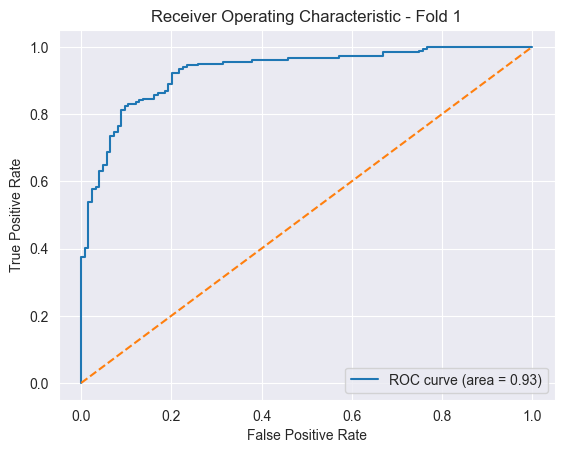

10/10 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.8529
Validation Score [0.7118178606033325, 0.8529411554336548]
Epoch 1/50
612/612 [==============================] - 1s 1ms/step - loss: 0.4290 - accuracy: 0.8072
Epoch 2/50
612/612 [==============================] - 1s 1ms/step - loss: 0.3158 - accuracy: 0.8775
Epoch 3/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2923 - accuracy: 0.8775
Epoch 4/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2814 - accuracy: 0.8873
Epoch 5/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2583 - accuracy: 0.8905
Epoch 6/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2514 - accuracy: 0.9020
Epoch 7/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9052
Epoch 8/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2230 - accuracy: 0.9134
Epoch 9/50
612/612 [==============================] - 1

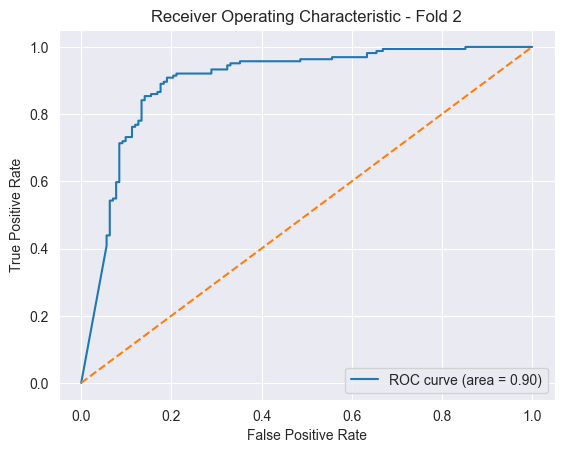

10/10 [==============================] - 0s 2ms/step - loss: 1.5814 - accuracy: 0.8627
Validation Score [1.5814357995986938, 0.8627451062202454]
Epoch 1/50
612/612 [==============================] - 2s 1ms/step - loss: 0.4390 - accuracy: 0.7925
Epoch 2/50
612/612 [==============================] - 1s 1ms/step - loss: 0.3199 - accuracy: 0.8742
Epoch 3/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2959 - accuracy: 0.8775
Epoch 4/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2830 - accuracy: 0.8807
Epoch 5/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2668 - accuracy: 0.8987
Epoch 6/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2531 - accuracy: 0.8971
Epoch 7/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2466 - accuracy: 0.9101
Epoch 8/50
612/612 [==============================] - 1s 1ms/step - loss: 0.2333 - accuracy: 0.9101
Epoch 9/50
612/612 [==============================] - 1

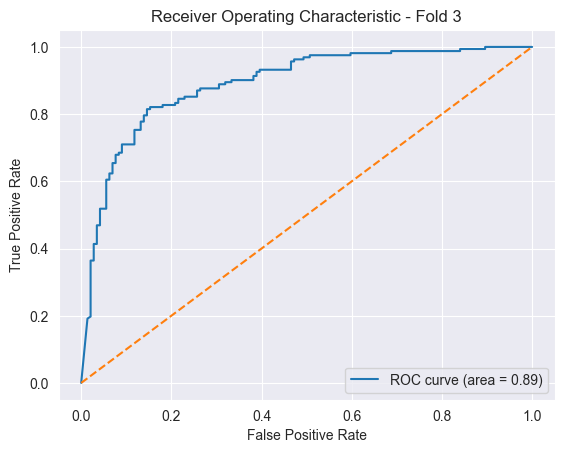

10/10 [==============================] - 0s 2ms/step - loss: 0.9690 - accuracy: 0.8170
Validation Score [0.9690142869949341, 0.8169934749603271]


In [98]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

K= 10

auc_scores= []

# initialize k-fold
kf= KFold(n_splits= k, shuffle= True, random_state= 42)

for train_index, val_index in kf.split(data):
    data_train, data_validation = data[train_index], data[val_index]
    labels_train, labels_validation= labels[train_index], labels[val_index]

    # Train the model
    model= build_model(data_train.shape[1])

    # train mmodel
    model.fit(
        data_train,
        labels_train,
        epochs=50,
        batch_size= 1,
        verbose= 1
    )

    probs= model.predict(data_validation)

    auc = roc_auc_score(labels_validation, probs)
    auc_scores.append(auc)

    fpr, tpr, thresholds= roc_curve(labels_validation, probs)

    # Plotting ROC curve for current fold
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - Fold {len(auc_scores)}')
    plt.legend(loc="lower right")
    plt.show()

    # Print the validation score
    val_score = model.evaluate(data_validation, labels_validation)
    print(f'Validation Score {val_score}')

In [99]:
# After all folds are processed, print the average AUC
print(f'Average AUC: {sum(auc_scores) / len(auc_scores)}')

Average AUC: 0.9053137807057073


# References

- Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction